In [50]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [51]:
#données du problème :

n=100 #discretisation

#temps:
t0=0
tf=299
lt=np.linspace(t0,tf,n+1)

#charge
Qm=10
c0=0.2
cf=1

#prix
ph=1
pb=0.5

#Intensité
Im=2

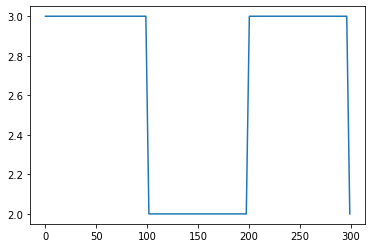

In [52]:
def PrixHoraire(t,ph,pb):
    n=np.floor(t)
    if n%200 < 99:
        return ph
    else:
        return pb
    
VPrixHoraire= np.vectorize(PrixHoraire)
lprix=VPrixHoraire(lt,3,2)
plt.plot(lt,lprix)
plt.show()

In [53]:
def charge(I): #donne la charge à tout temps(charge absolue, pas en %)
    c=c0*Qm
    charge=np.zeros(n)
    for i in range (n):
        Q=-(lt[i+1]-lt[i])*(I[i])
        c+=Q
        charge[i]=c
    return charge

In [54]:
def fcout1(I): 
    S=0
    listeS=[]
    for i in range (n):
        Q=-(lt[i+1]-lt[i])*I[i]
        P=PrixHoraire(lt[i],ph,pb) #On suppose ici que l'on ne change pas de prix horaire sur l'intervalle listet[i], listet[i+1]
        S+=P*Q
        listeS.append(S)
    return S,np.array(listeS)

In [55]:
def affichage(I):    
    lcout=fcout1(I)[1]
    lcharge=charge(I)
    lprix=VPrixHoraire(lt[0:n],3,2)
    plt.plot(lt[0:n],lcout,'+',label="cout")
    plt.plot(lt[0:n],lcharge,'+',label="charge")
    plt.plot(lt[0:n],lprix,'+',label="prix")
    plt.plot(lt[0:n],I,'+',label="intensité")
    plt.legend()
    plt.plot()


On va maintenant implémenter une solution spécifique à notre problème, n'utilisant pas de méthode d'optimisation mais uniquement les spécificités du problème.

Afin de minimiser le coût il faut charger le plus possible durant les périodes de bas coût et le moins possible durant les périodes où l'énergie est chère.

Il faut néanmoins que notre problème soit solvable (que l'énergie à fournir soit inférieure à celle que l'on peut fournir en chargeant tout le temps à pleine puissance).

In [108]:
def algoM():
    E=(cf-c0)*Qm #énergie à fournir
    
    #il faut connaitre le temps disponible en heures creuses/pleines
    Tp=[]
    Tc=[]
    deltaT=lt[1]-lt[0]#pas de temps
    for i in range (len(lt)-1):
        m=np.floor(lt[i])
        if m%200 < 99:
            Tp.append(i)
        else:
            Tc.append(i)
    tp=len(Tp)*deltaT #durée des heures pleines
    tc=len(Tc)*deltaT #durée des heures creuses
    
    I=np.zeros(n)
    
    if (tf-t0)*Im<E:
        return ("le temps de chargement n'est pas suffisant")
    
    elif tc*Im>E: #les heures creuses sont suffisantes 
        Ic=-E/tc
        
        for i in Tc:
            I[i]=Ic
        return I
    
    
    #il faut charger au maximum pendant les heures creuses et compléter par les heures pleines
    Ic=Im
    for i in Tc:
        I[i]=-Ic
    Ec=tc*Im #énergie reçue pendant les heures creuses
    Ip=(E-Ec)/tp
    for i in Tp:
        I[i]=-Ip
    return I
            
    
        

In [109]:
I=algoM()

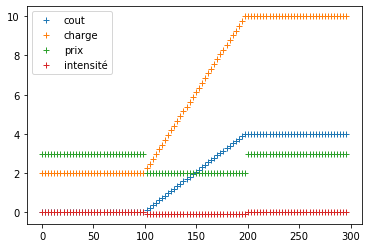

In [110]:
affichage(I)